# PART B: CONVOLUTIONAL NEURAL NETWORK CIFAR 100

<img src="./img/maxresdefault.png" alt="Drawing" style="width: 800px;"/>

## Library Imports


- NumPy: use for numerical computations
- Matplotlib: use for plotting
- Pandas: we use this to store our model results
- Plotly: use for plotting
- Tensorflow: Keras with a Tensorflow backend is the primary deep learning library used
- Seaborn: use for plotting

In [10]:
#Libraries

#Basic
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
sns.set(style="dark")
import tensorflow as tf

#Tensorflow
from tensorflow import expand_dims
# import keras_tuner
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Normalization, Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Dropout, BatchNormalization, ReLU, Layer, Reshape, Flatten, Activation, Multiply, Resizing, Lambda, AveragePooling2D, Add, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TerminateOnNaN, TensorBoard
from tensorflow.math import multiply
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
#Data Augmentation
from tensorflow.image import random_flip_left_right, random_crop, resize_with_crop_or_pad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

## References
- [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html)
- [Tensorflow-Fashion-MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist)
- [What is Data Augmentation? Techniques, Examples & Benefits](https://research.aimultiple.com/data-augmentation/)
- [Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2](https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/)
- [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)
- [Towards Theoretically Understanding Why SGD Generalizes Better Than ADAM in Deep Learning](https://arxiv.org/abs/2010.05627)
- [Use Early Stopping to Halt the Training of Neural Networks At the Right Time](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
- [How to use Learning Curves to Diagnose Machine Learning Model Performance](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)
- [Image Augmentation on the fly using Keras ImageDataGenerator!](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)
- [Step by step VGG16 implementation in Keras for beginners](https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c)
- [An Overview of Regularization Techniques in Deep Learning (with Python code)](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/)
- [Understand and Implement ResNet-50 with TensorFlow 2.0](https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691)
- [Getting started with KerasTuner](https://keras.io/guides/keras_tuner/getting_started/#query-the-results)
- [A Gentle Introduction to Batch Normalization for Deep Neural Networks](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)
- [ResNet-50: The Basics and a Quick Tutorial](https://datagen.tech/guides/computer-vision/resnet-50/)
- [Adam vs. SGD: Closing the generalization gap on image classification](https://opt-ml.org/papers/2021/paper53.pdf)
- [A 2021 Guide to improving CNNs-Optimizers: Adam vs SGD](https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008)
- [Leaky ReLU vs. ReLU Activation Functions: Which is Better?](https://towardsdatascience.com/leaky-relu-vs-relu-activation-functions-which-is-better-1a1533d0a89f)
- [Squeeze-and-Excitation Networks](https://towardsdatascience.com/squeeze-and-excitation-networks-9ef5e71eacd7)
- [How to Reduce Overfitting With Dropout Regularization in Keras](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/)
- [Dropout Neural Network Layer In Keras Explained](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)

## Random Seed
Setting random seed for numpy and tensorflow

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

## Problem Statement
Our problem statement is to develop a deep learning model that is capable of classifying images from the CIFAR-100 dataset.

### What is CIFAR-100?
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).[[1]](https://www.cs.toronto.edu/~kriz/cifar.html#:~:text=This%20dataset%20is,which%20it%20belongs)

Here is the list of classes in the CIFAR-100:
| Superclass  | Classes  |
|---|---|
| aquatic  | mammals	beaver, dolphin, otter, seal, whale  |
| fish  | aquarium fish, flatfish, ray, shark, trout  |
|  flowers | orchids, poppies, roses, sunflowers, tulips  |
| food containers | bottles, bowls, cans, cups, plates  |
| fruit and vegetables  | apples, mushrooms, oranges, pears, sweet peppers  |
| household electrical devices  | clock, computer keyboard, lamp, telephone, television  |
| household furniture  | bed, chair, couch, table, wardrobe  |
| insects  | bee, beetle, butterfly, caterpillar, cockroach  |
| large carnivores  | bear, leopard, lion, tiger, wolf  |
| large man-made outdoor things  | bridge, castle, house, road, skyscraper  |
| large natural outdoor scenes  | cloud, forest, mountain, plain, sea  |
| large omnivores and herbivores  | camel, cattle, chimpanzee, elephant, kangaroo  |
|  medium-sized mammals | fox, porcupine, possum, raccoon, skunk  |
|  non-insect invertebrates | crab, lobster, snail, spider, worm  |
| people  | baby, boy, girl, man, woman  |
| reptiles  | crocodile, dinosaur, lizard, snake, turtle  |
| small mammals  | hamster, mouse, rabbit, shrew, squirrel  |
| trees  | maple, oak, palm, pine, willow  |
| vehicles 1  | bicycle, bus, motorcycle, pickup truck, train  |
| vehicles 2  | lawn-mower, rocket, streetcar, tank, tractor  |

## What are our goals for the model?
Our goals for the model are to develop a model that is able to generalize well to new data points (that is, does not overfit)

The main reason why I'm setting this goal is that while having an accurate model on the training set is nice, if we want to actually use the model in the real world, it ought to be able to generalize well to new data.

### Optimizing Metrics (what I want to optimize)
To ensure that we create a model that generalises well, we want to minimise the difference in accuracy of the model between the training and validation set
### Satsifying Metrics (what still needs to be satisfied)
Since the model still needs to be fairly accurate, we expect that the accuracy of the model on the training set must be at least 60% and above, to ensure low avoidable bias. Considering the nature of CIFAR100 (only having 600 images per class)

## Data Ingestion
We will begin by loading our data. Since a function to download the dataset is already included in Keras, we will make use of it to quickly load our data.

In [12]:
from tensorflow.keras.datasets.cifar100 import load_data

## Data Splits

When training and evaluating our model, we will split our data into a training, validation, and testing set.

The training set will be used to train the model, the validation set for model tuning, and the testing set will be used to evaluate the final model, ensuring that it is able to generalize. (and does not overfit to the validation set as a result of our model tuning)

|**Split**|**Size**|
|-------- |--------|
|Training|40k|
|Validation|10k|
|Testing|10k|

we use label_mode='fine' to only load the fine labels in CIFAR100

In [13]:
(X_train, y_train), (X_test, y_test) = load_data(label_mode="fine")
train_size = 40000
X_train, y_train, X_val, y_val = X_train[:train_size], y_train[:train_size], X_train[train_size:], y_train[train_size:]

In [14]:
print("Length of Training Set:", len(X_train))
print("Length of Validation Set:", len(X_val))
print("Length of Testing Set:", len(X_test))

Length of Training Set: 40000
Length of Validation Set: 10000
Length of Testing Set: 10000


Each numbered label in the data set represents a specific object. To make the labels more readable, we will use a dictionary to map each number to the corresponding description.

In [15]:
class_labels = {
    0: 'apple',
    1: 'aquarium_fish',
    2: 'baby',
    3: 'bear',
    4: 'beaver',
    5: 'bed',
    6: 'bee',
    7: 'beetle',
    8: 'bicycle',
    9: 'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'crab',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm'
}

In [16]:
IMG_DIM = (32, 32, 3)

## Exploratory Data Analysis
Before we even start modelling, it's important to get a grip on the data. There are a few key questions to ask here:

- What are the dimensions of each image?
- What do the images look like for each class?
- What is the class distribution? Would accuracy be a useful metric to evaluate the model given the class distribution?
- What is the distribution of the pixels for each color channel?
- What is the "average" image for each class?

In [9]:
print('Shape of image in X_train: ', X_train.shape)
print('Shape of image in X_test: ', X_test.shape)
print('Shape of image in X_val: ', X_val.shape)

Shape of image in X_train:  (40000, 32, 32, 3)
Shape of image in X_test:  (10000, 32, 32, 3)
Shape of image in X_val:  (10000, 32, 32, 3)


### Dimension of each image

In [9]:
X_train[0].shape

(32, 32, 3)

### Vizualising the Dataset
Let's take a look at a subset of random images first.

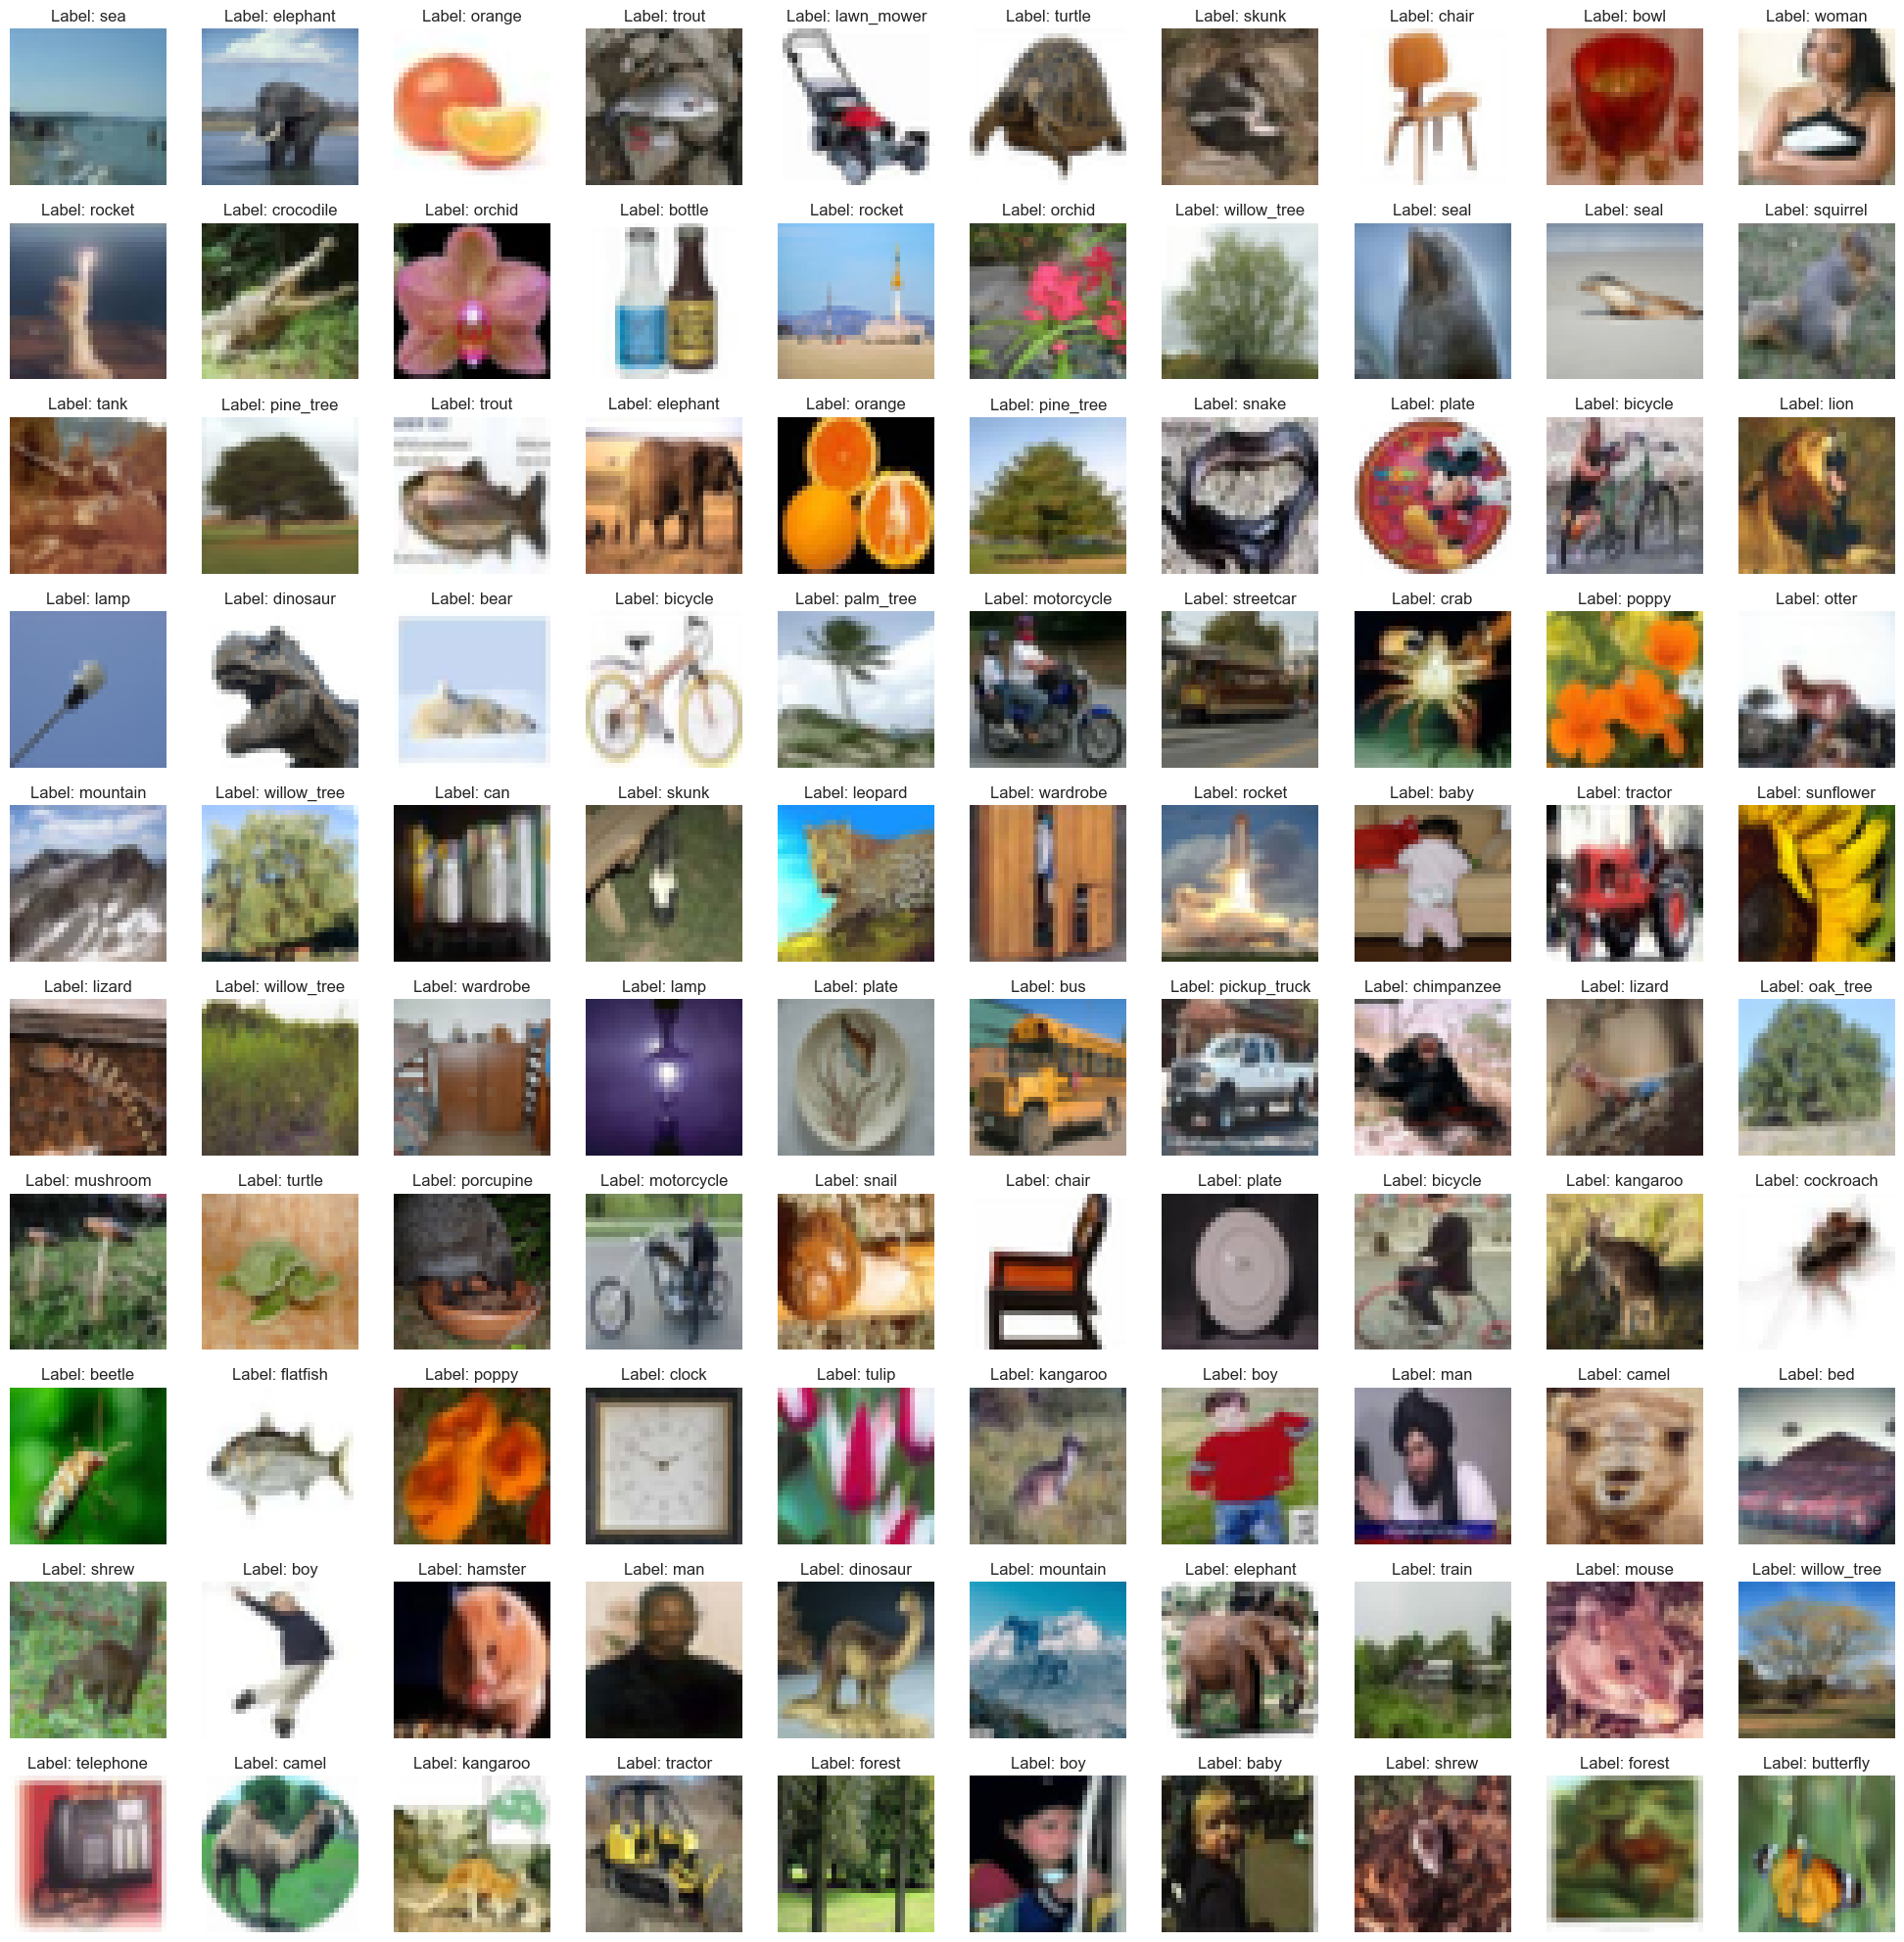

In [10]:
random_idxs = np.random.choice(X_train.shape[0], 100, replace=False)
fig, ax = plt.subplots(10, 10, figsize=(20, 20), tight_layout=True)
for idx, subplot in zip(random_idxs, ax.ravel()):
  subplot.axis("off")
  subplot.imshow(X_train[idx])
  subplot.set_title(f"Label: {class_labels[y_train[idx, 0]]}")

### Visualization of Class Distribution

In [12]:
labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(labels, counts):
  print(f"{class_labels[label]}: {count}")

apple: 397
aquarium_fish: 387
baby: 402
bear: 398
beaver: 389
bed: 391
bee: 404
beetle: 391
bicycle: 423
bottle: 398
bowl: 374
boy: 398
bridge: 398
bus: 393
butterfly: 415
camel: 393
can: 414
castle: 408
caterpillar: 413
cattle: 416
chair: 398
chimpanzee: 409
clock: 412
cloud: 396
cockroach: 395
couch: 386
crab: 396
crocodile: 398
cup: 382
dinosaur: 390
dolphin: 391
elephant: 413
flatfish: 417
forest: 412
fox: 409
girl: 401
hamster: 401
house: 390
kangaroo: 408
keyboard: 391
lamp: 409
lawn_mower: 396
leopard: 410
lion: 413
lizard: 396
lobster: 394
man: 394
maple_tree: 388
motorcycle: 399
mountain: 403
mouse: 388
mushroom: 395
oak_tree: 383
orange: 389
orchid: 415
otter: 396
palm_tree: 398
pear: 396
pickup_truck: 413
pine_tree: 414
plain: 416
plate: 414
poppy: 399
porcupine: 402
possum: 402
rabbit: 408
raccoon: 413
ray: 411
road: 406
rocket: 410
rose: 405
sea: 417
seal: 412
shark: 398
shrew: 395
skunk: 394
skyscraper: 395
snail: 395
snake: 408
spider: 394
squirrel: 387
streetcar: 408
su

<BarContainer object of 100 artists>

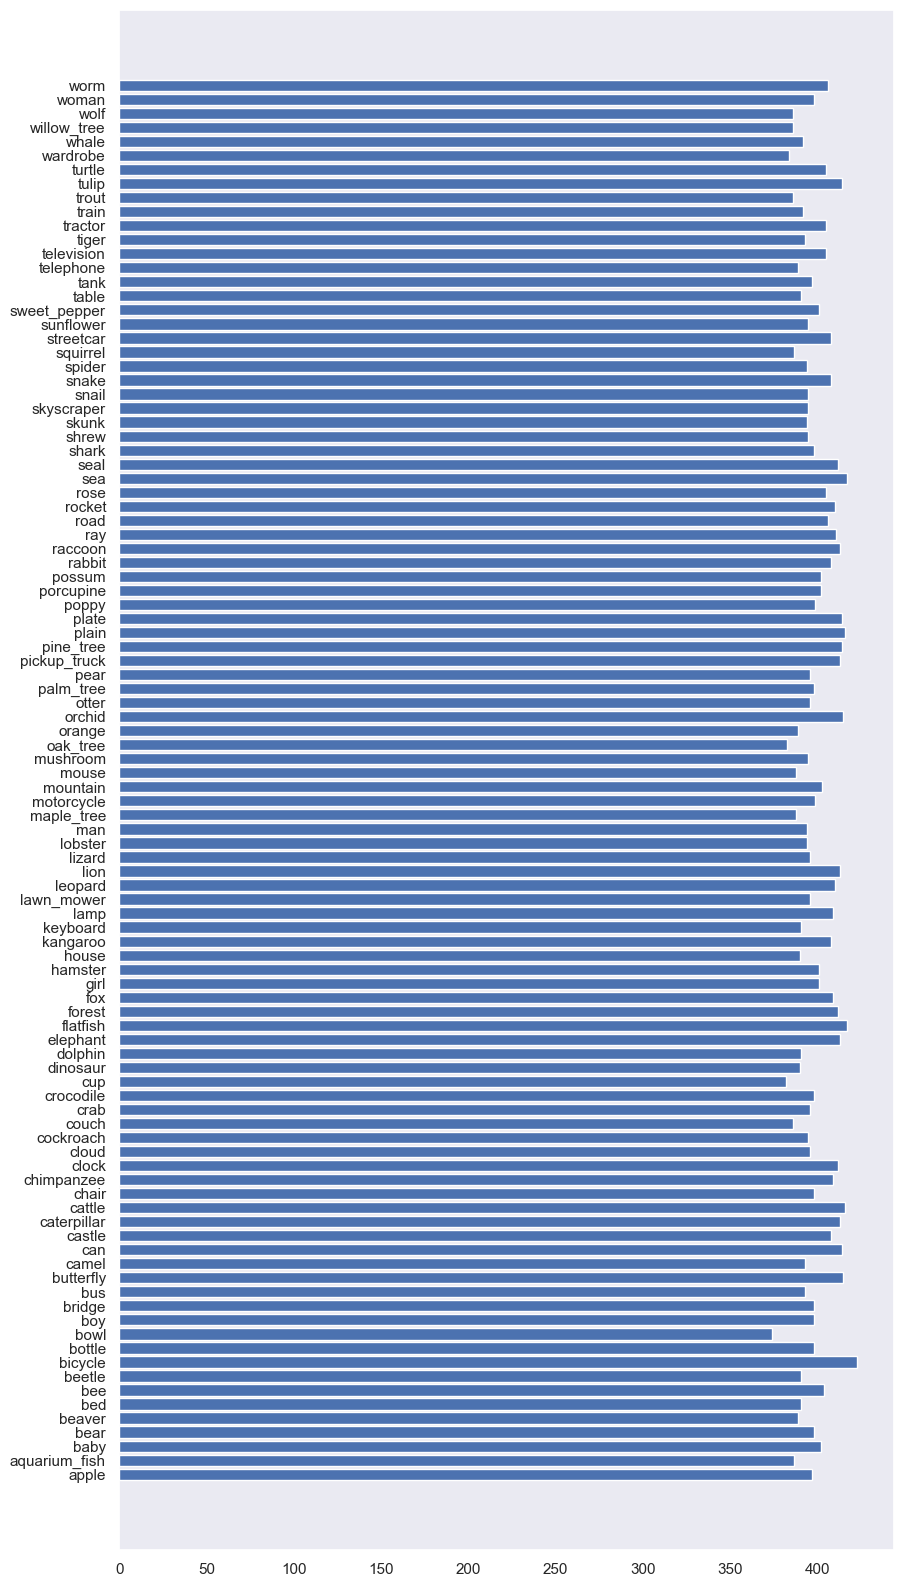

In [13]:
plt.figure(figsize=(10,20))
plt.barh(labels, counts, tick_label=list(class_labels.values()))

We can see that there is an even class balance. This means that we can make use of accuracy as our primary metric, as there is no real "minority" class, so accuracy is a good measure of classification performance.

### What does the distribution of the images look like?

In [14]:
mean, std = np.mean(X_train, axis=(0, 1, 2)), np.std(X_train, axis=(0, 1, 2))
print("Mean:", mean)
print("std:", std)

Mean: [129.26910793 124.11666553 112.55583118]
std: [68.11519598 65.3142698  70.31977601]


These are the average and standard deviation of pixel intensities on each color channel (Red, Blue, Green)

They are similar

### What is the "average" image?

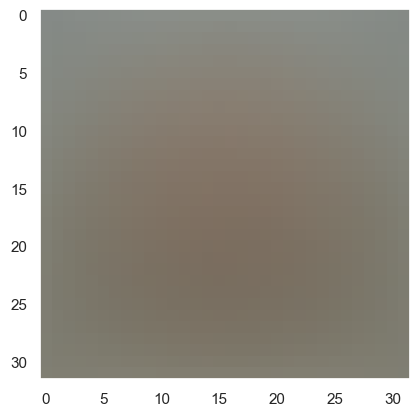

In [15]:
plt.imshow(np.mean(X_train, axis=0) / 255)

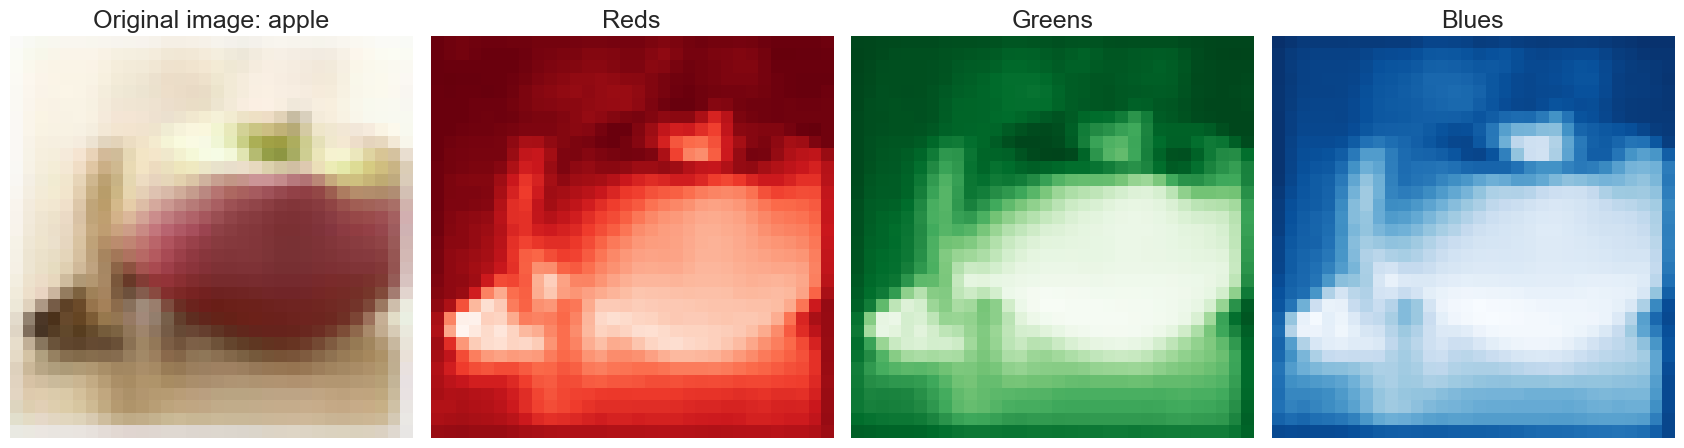

In [19]:
#Getting a better idea of the RGB layers in an image
# print(f"""Fine label :{CIFAR100_LABELS_LIST[y_train[3][0]]}
# """)
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 4, figsize=(17,7), sharey = True)
    ax[0].imshow(X_train[2])
    ax[0].set_title(f'Original image: {class_labels[y_train[2, 0]]}', fontsize = 18)
    ax[0].axis('off')
    for i in range(3):
        ax[i+1].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i+1].set_title(rgb_list[i], fontsize = 18)
        ax[i+1].axis('off')
    
    fig.tight_layout()
rgb_splitter(X_train[2])

## Data Preprocessing

### Encoding Target Labels

In [17]:
y_train = to_categorical(y_train) # one hot encode
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [18]:
print(y_train[0])
print("Label:", tf.argmax(y_train[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Label: tf.Tensor(19, shape=(), dtype=int64)


### Normalisation

![title](./img/img1.png)

Subtracting the dataset mean serves to "center" the data. Additionally, you ideally would like to divide by the sttdev of that feature or pixel as well if you want to normalize each feature value to a z-score.

The reason we do both of those things is because in the process of training our network, we're going to be multiplying (weights) and adding to (biases) these initial inputs in order to cause activations that we then backpropogate with the gradients to train the model.

We'd like in this process for each feature to have a similar range so that our gradients don't go out of control (and that we only need one global learning rate multiplier).

Another way you can think about it is deep learning networks traditionally share many parameters - if you didn't scale your inputs in a way that resulted in similarly-ranged feature values (ie: over the whole dataset by subtracting mean) sharing wouldn't happen very easily because to one part of the image weight w is a lot and to another it's too small.

In [19]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255
X_test_norm = X_test / 255

C:\Users\p2123037\AppData\Local\Temp\ipykernel_2348\687698110.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


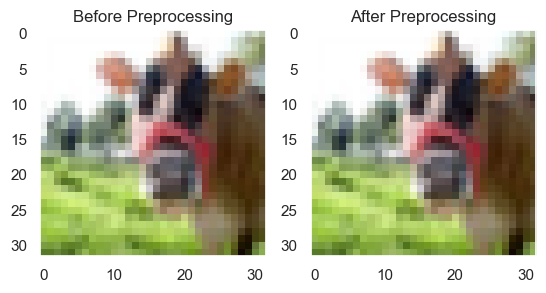

In [20]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(X_train[0], cmap='gray')
ax[0].set_title('Before Preprocessing')
ax[1].imshow(X_train_norm[0], cmap='gray')
ax[1].set_title('After Preprocessing')
fig.show()

### Data Augmentation

Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.[[1]](https://research.aimultiple.com/data-augmentation/#:~:text=Data%C2%A0augmentation%C2%A0is%C2%A0a%C2%A0set%C2%A0of%C2%A0techniques%C2%A0to%C2%A0artificially%C2%A0increase%C2%A0the%C2%A0amount%C2%A0of%C2%A0data%C2%A0by%C2%A0generating%C2%A0new%C2%A0data%C2%A0points%C2%A0from%C2%A0existing%C2%A0data.%C2%A0This%C2%A0includes%C2%A0making%C2%A0small%C2%A0changes%C2%A0to%C2%A0data%C2%A0or%C2%A0using%C2%A0deep%C2%A0learning%C2%A0models%C2%A0to%C2%A0generate%C2%A0new%C2%A0data%C2%A0points.) We will be making use of kera's ImageDataGenerator to help us in this process
#### Data Augmentation's importance
Data augmentation is useful to improve performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.[[2]](https://research.aimultiple.com/data-augmentation/#:~:text=Data%20augmentation%20is%20useful%20to%20improve%20performance%20and%20outcomes%20of%20machine%20learning%20models%20by%20forming%20new%20and%20different%20examples%20to%20train%20datasets.%20If%20the%20dataset%20in%20a%20machine%20learning%20model%20is%20rich%20and%20sufficient%2C%20the%20model%20performs%20better%20and%20more%20accurately)

I did not want to have too strong of a data augmentation to start with, out of fear that it might cause the model to overfit this simple data augmentation has been shown to be decently effective. Nevertheless, I will try out a stronger data augmentation method later on as part of my experimentation. I also want to make the data augmentation resonable, for example in our case you would rarely see a car upside down hence on rotation range of 45

In [21]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

I use pretty simple data augmentaion, I want to make the augmentated data reasonable. For example, you will rarely see a car that is upside down, therefore the parameters for ImageDataGenerator isn't drastic.

In [22]:
datagen.fit(X_train_norm)

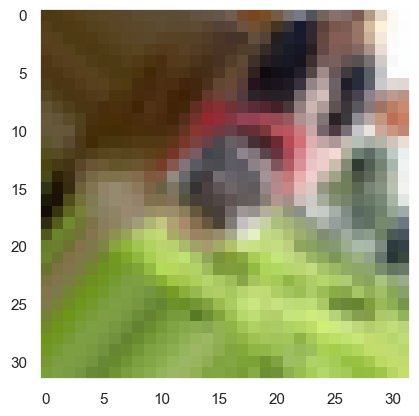

In [23]:
plt.imshow(datagen.random_transform(X_train_norm[0]), cmap='gray')

### CutMix Data Augmentation

As we know that to improve the performance of an ML model, one of the ways is to implement Data Augmentation in our data preprocessing steps. There are varuious ways of Data Augmentation, one such technique introduced recently is CutMix.

What is CutMix?

In CutMix augmentation we cut and paste random patches between the training images. The ground truth labels are mixed in proportion to the area of patches in the images. CutMix increases localization ability by making the model to focus on less discriminative parts of the object being classified and hence is also well suited for tasks like object detection. [[5]](https://sarthakforwet.medium.com/cutmix-a-new-strategy-for-data-augmentation-bbc1c3d29aab#27f9:~:text=In%20CutMix%20augmentation,object%20detection.)

In [24]:
AUTO = tf.data.AUTOTUNE
IMG_SIZE = 32
BATCH_SIZE = 128

In [25]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    return image, label

In [26]:
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

val_ds = (
    val_ds.map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

In [27]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)

In [28]:
@tf.function
def get_box(lambda_value):
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = IMG_SIZE * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = IMG_SIZE * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

    target_h = bby2 - boundaryy1
    if target_h == 0:
        target_h += 1

    target_w = bbx2 - boundaryx1
    if target_w == 0:
        target_w += 1

    return boundaryx1, boundaryy1, target_h, target_w

In [29]:
@tf.function
def cutmix(train_ds_one, train_ds_two):
    (image1, label1), (image2, label2) = train_ds_one, train_ds_two

    alpha = [0.25]
    beta = [0.25]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label

In [30]:
train_ds_cmu = (
    train_ds.shuffle(1024)
    .map(cutmix, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

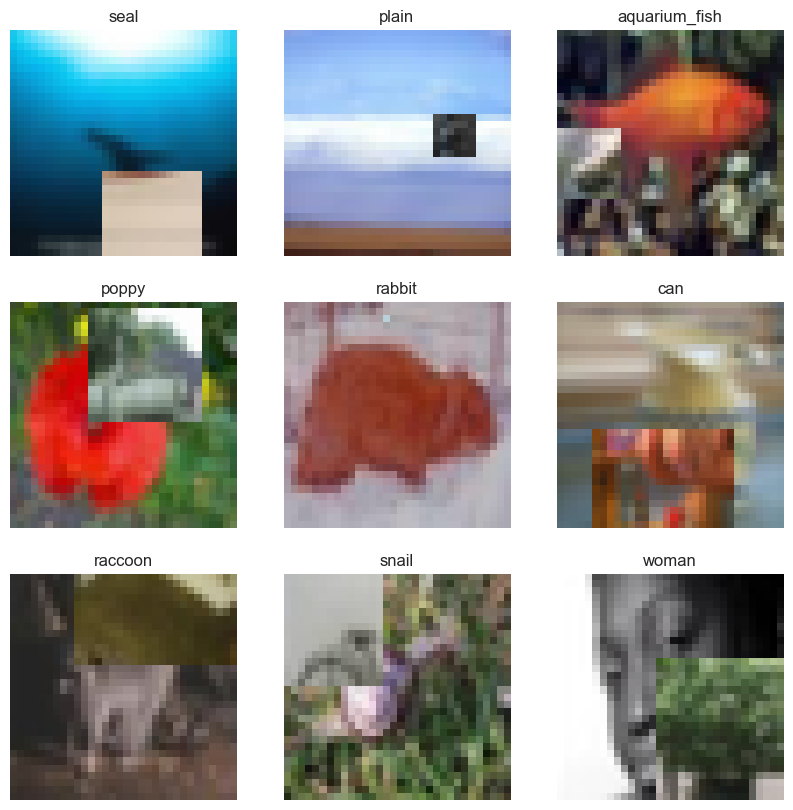

In [31]:
# Let's preview 9 samples from the dataset
image_batch, label_batch = next(iter(train_ds_cmu))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_labels[np.argmax(label_batch[i])])
    plt.imshow(image_batch[i], cmap='gray')
    plt.axis("off")

## Modelling

We will now proceed to modelling

For this project we will be using CNN to model our data

### Callbacks
We use early callback and reduce learning rate on plateau

#### Ealry Stopping
Stop training when a monitored metric has stopped improving. This is good as we can have a large echpo cap and be ensured that our model wouldnt run unnessacrily if validation accuracy doesnt increase, saving us time.

#### ReduceLROnPlateau
Neither too high nor too low learning rate should be considered for training a NN. A large learning rate can miss the global minimum and in extreme cases can cause the model to diverge completely from the optimal solution. On the other hand, a small learning rate can stuck to a local minimum.

ReduceLROnPlateau purpose is to track your model's performance and reduce the learning rate when there is no improvement for x number of epochs. The intuition is that the model approached a sub-optimal solution with current learning rate and oscillate around the global minimum. Reducing the learning rate would enable the model to take smaller learning steps to the optimal solution of the cost function.

### Optimizer 

For all models, we will train them using adam. In the later part we will be trying out other optimizers to see if the model benfits from it.

For learning rate scheduling, I begin by adopting a basic learning rate scheduler, which is to use a a callback to Reduce the Learning Rate when the validation loss plateaus.

A problem with training neural networks is in the choice of the number of training epochs to use. Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.[[4]](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=A%20problem%20with,neural%20network%20models.) Therefore, we shall make use of ealry stopping, as our goal of training the model is to minimize the loss.

To make training the model and look at the results of each model easier, I have created a function that will run the model and store the results in a pandas dataframe.

### Evaluation 
We will be using accuarcy as the evaluation metric and also plot a learning curve of the loss of the model to check if the model overfits

### Learning Curve

#### Why Learning Curve?
A learning curve is a plot of model learning performance over experience or time.

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.

Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative. 

In [32]:
def plot_loss_curve(model_history):
    model_history = pd.DataFrame(model_history)
    epochs = list(range(1, len(model_history) + 1))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=epochs, y=model_history["loss"],
                    mode='lines+markers',
                    name='Training Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=model_history["val_loss"],
                    mode='lines+markers',
                    name='Validation Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=model_history["accuracy"],
                    mode="lines+markers",
                    name="Training Accuracy"))
    fig.add_trace(go.Scatter(x=epochs, y=model_history["val_accuracy"],
                           mode="lines+markers",
                           name="Validation Accuracy"))
    fig.update_layout(
      title="Loss/Acc Plot",
      xaxis_title="Epochs",
      yaxis_title="Loss/Acc",
      )

    return fig

### Default parameter

In [33]:
LR = 0.001 
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0005
VAL_SPLIT = 0.2 
MAX_EPOCHS = 300 
starting_hparams = {
    "val_split" : VAL_SPLIT,
    "max_epochs" : MAX_EPOCHS,
    "batch_size" : BATCH_SIZE
}

### Results History Dataframe

In [34]:
result_history = pd.DataFrame({
          "Model Name" : [],
          "Epochs" : [],
          "Batch Size" : [],
          "Train Loss" : [],
          "Test Loss" : [],
          "Train Acc" : [],
          "Test Acc" : [],
          "[Train - Test] Acc" : []
      })

### Evaluation function
I created this funcion so that it would be easier to call the model and run as my cumix data and normal data requires different syntax to call it. This due to my cutmix data being in the datatype of a tensor and the norm data in the type is numpy array

In [35]:
def evaluate_model(model, training_data, validation_data, data_aug=False, cutmix=False, hyperparameters = starting_hparams, callbacks = None, plot_loss = True, remarks = ""):
    """
    Evaluate a model. Assumes the model has already been compiled, so compilation and choice of optimizer must be done beforehand
    """
    # Train Model
    tf.keras.backend.clear_session() # clear all previous models from memorY
    if callbacks is None:
        callbacks = [EarlyStopping(monitor='val_accuracy',patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)]
    name = model.name
    validation_split = hyperparameters["val_split"]
    epochs = hyperparameters["max_epochs"]
    batch_size = hyperparameters["batch_size"]
    print(f"Training {name}")
    if data_aug == False:
        X_train, y_train = training_data
        if validation_data is None:
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split,callbacks=callbacks)
        else:
            history = model.fit(X_train, y_train, validation_data=validation_data, epochs=epochs, batch_size=batch_size,callbacks=callbacks)
        history = history.history
    else:
        if cutmix == True:
            if validation_data is None:
                history = model.fit(training_data, epochs=epochs, batch_size=batch_size, validation_split=validation_split,callbacks=callbacks)
            else:
                history = model.fit(training_data, validation_data=validation_data, epochs=epochs, batch_size=batch_size,callbacks=callbacks)
            history = history.history
        else:
            X_train, y_train = training_data
            if validation_data is None:
                history = model.fit(datagen.flow(X_train, y_train), epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=callbacks)
            else:
                history = model.fit(datagen.flow(X_train, y_train), validation_data=validation_data, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
            history = history.history
      # print(history)
    if plot_loss:
        fig = plot_loss_curve(history)
    else:
        fig = None
    result = dict()
    result["Epochs"] = len(history["loss"])
    result["Batch Size"] = batch_size
    result["Model Name"] = name
    best_val_idx = np.argmax(history["val_accuracy"])
    result["Train Loss"] = history["loss"][best_val_idx]
    result["Test Loss"] = history["val_loss"][best_val_idx]
    result["Train Acc"] = history["accuracy"][best_val_idx]
    result["Test Acc"] = history["val_accuracy"][best_val_idx]
    result["[Train - Test] Acc"] = result["Train Acc"] - result["Test Acc"]
    tf.keras.backend.clear_session() # clear all previous models from memory
    return pd.Series(result), fig

## Baseline Model (ANN) aka Fully connected nural network

As our initial baseline, I choose to build a fully connected neural network with 4 hidden layers.

In [36]:
def ANN(optimizer, name='ANN'):
    model = Sequential(name = name)
    model.add(Flatten())
    model.add(Dense(units=512, activation='ReLU'))
    model.add(Dense(units=256, activation='ReLU'))
    model.add(Dense(units=128, activation='ReLU'))
    model.add(Dense(units=64, activation='ReLU'))
    model.add(Dense(units=100, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
model_ANN = ANN('adam')
results, fig = evaluate_model(model_ANN, (X_train_norm, y_train), (X_val_norm, y_val))

Training ANN
Epoch 1/300
313/313 [==============================] - 4s 8ms/step - loss: 4.3549 - accuracy: 0.0368 - val_loss: 4.1016 - val_accuracy: 0.0692 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 2s 7ms/step - loss: 3.9644 - accuracy: 0.0851 - val_loss: 3.9253 - val_accuracy: 0.0899 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 2s 7ms/step - loss: 3.8087 - accuracy: 0.1120 - val_loss: 3.7746 - val_accuracy: 0.1195 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 2s 7ms/step - loss: 3.6827 - accuracy: 0.1347 - val_loss: 3.6786 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 2s 7ms/step - loss: 3.5959 - accuracy: 0.1499 - val_loss: 3.6211 - val_accuracy: 0.1469 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 2s 7ms/step - loss: 3.5167 - accuracy: 0.1641 - val_loss: 3.5716 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 7/300
313/313 [==============================

In [38]:
model_ANN.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 100)               6500      
                                                                 
Total params: 1,752,356
Trainable params: 1,752,356
Non-trainab

In [39]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_8836\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      46
Batch Size                 128
Model Name                 ANN
Train Loss            2.426864
Test Loss             3.366276
Train Acc             0.379425
Test Acc                0.2303
[Train - Test] Acc    0.149125
dtype: object

In [40]:
fig.show()

From the learning plot we can tell that our baseline model:
- Performs horribly on the dataset, with an accuracy of 22%
- Overfits and is unable to adpat to the validation data

### Baseline with basic data augmentation

In [45]:
model_ANN = ANN('adam', name='ANN_with_data_augmentation')
results, fig = evaluate_model(model_ANN, (X_train_norm, y_train), (X_val_norm, y_val), data_aug=True)

Training ANN_with_data_augmentation
Epoch 1/300
1250/1250 [==============================] - 14s 11ms/step - loss: 4.4504 - accuracy: 0.0237 - val_loss: 4.2843 - val_accuracy: 0.0359 - lr: 0.0010
Epoch 2/300
1250/1250 [==============================] - 14s 11ms/step - loss: 4.2512 - accuracy: 0.0422 - val_loss: 4.1882 - val_accuracy: 0.0521 - lr: 0.0010
Epoch 3/300
1250/1250 [==============================] - 13s 11ms/step - loss: 4.1525 - accuracy: 0.0590 - val_loss: 4.0265 - val_accuracy: 0.0768 - lr: 0.0010
Epoch 4/300
1250/1250 [==============================] - 13s 10ms/step - loss: 4.0380 - accuracy: 0.0758 - val_loss: 3.9378 - val_accuracy: 0.0929 - lr: 0.0010
Epoch 5/300
1250/1250 [==============================] - 13s 10ms/step - loss: 3.9727 - accuracy: 0.0868 - val_loss: 3.9163 - val_accuracy: 0.0972 - lr: 0.0010
Epoch 6/300
1250/1250 [==============================] - 13s 11ms/step - loss: 3.9310 - accuracy: 0.0927 - val_loss: 3.8898 - val_accuracy: 0.0988 - lr: 0.0010
Epoc

In [46]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_8748\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                                        55
Batch Size                                   128
Model Name            ANN_with_data_augmentation
Train Loss                              3.507646
Test Loss                               3.550776
Train Acc                                 0.1566
Test Acc                                  0.1627
[Train - Test] Acc                       -0.0061
dtype: object

In [47]:
fig.show()

From the learning plot we can see that the model with basic data augmentation:
- Solves the overfitting problem we have with the previuos model. However....
- It performs much worse with a validation accuacury of only 16%...

## Resnet50

<img src="./img/resnet.png" alt="pic of resnet 50" style="width: 600px;"/>

What Is the ResNet-50 Model?

ResNet stands for Residual Network and is a specific type of convolutional neural network (CNN) introduced in the 2015 paper “Deep Residual Learning for Image Recognition” by He Kaiming, Zhang Xiangyu, Ren Shaoqing, and Sun Jian. CNNs are commonly used to power computer vision applications.

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). Residual neural networks are a type of artificial neural network (ANN) that forms networks by stacking residual blocks.

I would'nt expect resnet50 to perform well as resnet needs to be trained for a long time in order for it to perform well.

In [114]:
def res_identity(x, filters): 
  #renet block where dimension doesnot change.
  #The skip connection is just simple identity conncection
  #we will have 3 blocks and then input will be added

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation('relu')(x)

  return x

In [115]:
def res_conv(x, s, filters):
  '''
  here the input size changes''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(WEIGHT_DECAY))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation('relu')(x)

  return x

In [124]:
def resnet50(name='Resnet50'):

  input_im = Input(shape=IMG_DIM)
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(class_labels), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  model = Model(inputs=input_im, outputs=x, name=name)

  return model

In [ ]:
def resnet50_squeeze_excite(name='Resnet50'):

  input_im = Input(shape=IMG_DIM)
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(class_labels), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  model = Model(inputs=input_im, outputs=x, name=name)

  return model

In [ ]:
def se_block(in_block, ch, ratio=16):
    x = GlobalAveragePooling2D()(in_block)
    x = Dense(ch//ratio, activation='relu')(x)
    x = Dense(ch, activation='sigmoid')(x)
    return multiply()([in_block, x])

In [125]:
resnet50 = resnet50()

In [126]:
resnet50.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

In [127]:
resnet50.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Resnet50 with cutmix data augmentation

In [128]:
results, fig = evaluate_model(resnet50, train_ds_cmu, val_ds, data_aug=True, cutmix=True)

Training Resnet50
Epoch 1/300
313/313 [==============================] - 25s 65ms/step - loss: 12.6555 - accuracy: 0.0500 - val_loss: 124.4922 - val_accuracy: 0.0131 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 19s 61ms/step - loss: 10.4185 - accuracy: 0.0746 - val_loss: 9.1963 - val_accuracy: 0.0594 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 19s 60ms/step - loss: 8.9850 - accuracy: 0.0828 - val_loss: 68.9651 - val_accuracy: 0.0351 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 19s 61ms/step - loss: 7.8448 - accuracy: 0.0976 - val_loss: 7.2217 - val_accuracy: 0.0885 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 18s 56ms/step - loss: 7.0881 - accuracy: 0.1127 - val_loss: 6.3838 - val_accuracy: 0.1294 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 19s 60ms/step - loss: 6.5573 - accuracy: 0.1222 - val_loss: 6.5687 - val_accuracy: 0.0807 - lr: 0.0010
Epoch 7/300
313/313 [========

In [129]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_8836\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      73
Batch Size                 128
Model Name            Resnet50
Train Loss            2.745706
Test Loss             2.339915
Train Acc              0.49225
Test Acc                0.4667
[Train - Test] Acc     0.02555
dtype: object

In [130]:
fig.show()

From the learning plot we can tell that our model:
- Does not overfit but we do notice that the validation loss has very noticable spikes, the spikes are an unavoidable consequence of Mini-Batch Gradient Descent in Adam. Some mini-batches have 'by chance' unlucky data for the optimization, inducing those spikes you see in your cost function using Adam. 
- Peforms better than the baseline but the validation accuracy is still very undeseriable

## VGG16

<img src="./img/VGG.png" alt="VGG" style="width: 600px;"/>

We will construct a simple CNN based on the VGG16 architecture

Instead of just wholesale taking the VGG architecture, I made certain improvements. The improvements are listed below

- Added Batch Normalization: BN has a regularizing effect on a CNN, by normalising inputs to layers deeper into a network)
- L2 Regularization: To further reduce overfitting.

This leaves us with a total of 16 layers (13 convolutional layers and 3 dense layers)

Why not add a dropout layer?

Batch normalization offers some regularization effect, reducing generalization error, perhaps no longer requiring the use of dropout for regularization. Further, it may not be a good idea to use batch normalization and dropout in the same network. The reason is that the statistics used to normalize the activations of the prior layer may become noisy given the random dropping out of nodes during the dropout procedure.


### VGG with batch normalization and l2 regularization

#### Why add batch normalization and l2 regularization?

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.[[6]](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/#:~:text=Batch%20normalization%20is%20a%20technique%20for%20training%20very%20deep%20neural%20networks%20that%20standardizes%20the%20inputs%20to%20a%20layer%20for%20each%20mini%2Dbatch.%20This%20has%20the%20effect%20of%20stabilizing%20the%20learning%20process%20and%20dramatically%20reducing%20the%20number%20of%20training%20epochs%20required%20to%20train%20deep%20networks.)

Before or after the nonlinearity ?

Historically, BN layer is positioned right before the nonlinear function, however some experiments showed that positioning BN layers right after the nonlinear function leads to better results. Still, many commonly used architecture of transfer learning apply BN before nonlinearity (ResNet, mobilenet-v2 etc). As far as I know, this question is still discussed and there is no right answer but for my VGG16 model I put it after the activation.

Performing L2 regularization encourages the weight values towards zero (but not exactly zero). Intuitively speaking smaller weights reduce the impact of the hidden neurons. In that case, those hidden neurons become neglectable and the overall complexity of the neural network gets reduced. Therefore we will be add L2 regularization to all our convolutional layers and dense layers

In [50]:
def VGG16_v1(optimizer, name = 'VGG16_v1'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=IMG_DIM, filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=100, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### VGG16_v1 

In [51]:
model_VGG16_v1 = VGG16_v1('adam')

In [52]:
results, fig = evaluate_model(model_VGG16_v1, (X_train_norm, y_train), (X_val_norm, y_val))

Training VGG16_v1
Epoch 1/300
313/313 [==============================] - 31s 83ms/step - loss: 6.3547 - accuracy: 0.0247 - val_loss: 5.7575 - val_accuracy: 0.0103 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 26s 83ms/step - loss: 4.6531 - accuracy: 0.0360 - val_loss: 4.6953 - val_accuracy: 0.0318 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 27s 86ms/step - loss: 4.2630 - accuracy: 0.0539 - val_loss: 4.2753 - val_accuracy: 0.0442 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 27s 86ms/step - loss: 4.0878 - accuracy: 0.0660 - val_loss: 4.3026 - val_accuracy: 0.0493 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 27s 88ms/step - loss: 3.9650 - accuracy: 0.0807 - val_loss: 4.1892 - val_accuracy: 0.0595 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 24s 78ms/step - loss: 3.8072 - accuracy: 0.1046 - val_loss: 3.9141 - val_accuracy: 0.0953 - lr: 0.0010
Epoch 7/300
313/313 [=============

In [53]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_8748\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      35
Batch Size                 128
Model Name            VGG16_v1
Train Loss            1.560168
Test Loss             3.075996
Train Acc             0.656425
Test Acc                0.3978
[Train - Test] Acc    0.258625
dtype: object

In [54]:
fig.show()

From the learning plot we can see that the model:
- Overfits
- Performs better than baseline but results are still undesirable, validation accuracy of 39%

### VGG16_v1 with basic data augmentation

In [55]:
model_VGG16_v1_data_augmentation = VGG16_v1('adam', name='VGG16_v1_data_augmentation')

In [56]:
results, fig = evaluate_model(model_VGG16_v1, (X_train_norm, y_train), (X_val_norm, y_val), data_aug=True)

Training VGG16_v1
Epoch 1/300
1250/1250 [==============================] - 57s 44ms/step - loss: 7.1783 - accuracy: 0.1303 - val_loss: 4.6438 - val_accuracy: 0.3360 - lr: 1.0000e-06
Epoch 2/300
1250/1250 [==============================] - 55s 44ms/step - loss: 6.6617 - accuracy: 0.1326 - val_loss: 4.4448 - val_accuracy: 0.3331 - lr: 1.0000e-06
Epoch 3/300
1250/1250 [==============================] - 59s 47ms/step - loss: 6.2076 - accuracy: 0.1322 - val_loss: 4.2925 - val_accuracy: 0.3216 - lr: 1.0000e-06
Epoch 4/300
1250/1250 [==============================] - 56s 45ms/step - loss: 5.8358 - accuracy: 0.1276 - val_loss: 4.1175 - val_accuracy: 0.3129 - lr: 1.0000e-06
Epoch 5/300
1250/1250 [==============================] - 57s 45ms/step - loss: 5.5099 - accuracy: 0.1256 - val_loss: 3.9223 - val_accuracy: 0.3102 - lr: 1.0000e-06
Epoch 6/300
1250/1250 [==============================] - 56s 45ms/step - loss: 5.2715 - accuracy: 0.1243 - val_loss: 3.8598 - val_accuracy: 0.3008 - lr: 1.0000e-0

In [57]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\leeha\AppData\Local\Temp\ipykernel_8748\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      11
Batch Size                 128
Model Name            VGG16_v1
Train Loss            7.178316
Test Loss             4.643839
Train Acc              0.13035
Test Acc                 0.336
[Train - Test] Acc    -0.20565
dtype: object

In [58]:
fig.show()

From the learning plot we can see that the model:
- Performs very poorly, just a bit better than the baseline model
- Underfits

### VGG16_v1 with cutmix data augmentation

In [137]:
model_VGG16_v1_cutmix = VGG16_v1('adam')

In [138]:
results, fig = evaluate_model(model_VGG16_v1_cutmix, train_ds_cmu, val_ds, data_aug=True, cutmix=True)

Training VGG16_BN_l2
Epoch 1/300
313/313 [==============================] - 13s 38ms/step - loss: 6.4230 - accuracy: 0.0213 - val_loss: 5.4940 - val_accuracy: 0.0079 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 12s 37ms/step - loss: 4.8209 - accuracy: 0.0337 - val_loss: 4.6072 - val_accuracy: 0.0291 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 12s 37ms/step - loss: 4.4814 - accuracy: 0.0426 - val_loss: 4.3074 - val_accuracy: 0.0421 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 12s 37ms/step - loss: 4.3498 - accuracy: 0.0488 - val_loss: 4.2196 - val_accuracy: 0.0445 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 12s 39ms/step - loss: 4.2651 - accuracy: 0.0544 - val_loss: 4.3783 - val_accuracy: 0.0446 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 12s 39ms/step - loss: 4.2061 - accuracy: 0.0646 - val_loss: 4.0480 - val_accuracy: 0.0745 - lr: 0.0010
Epoch 7/300
313/313 [==========

In [139]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_8836\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                         82
Batch Size                    128
Model Name            VGG16_BN_l2
Train Loss               3.101676
Test Loss                2.476417
Train Acc                  0.3709
Test Acc                   0.3968
[Train - Test] Acc        -0.0259
dtype: object

In [140]:
fig.show()

From the learning plot we can tell that our model:
- Underfits
- Performs better than baseline but worse than resnet and still undseriable

### Making custom changes to VGG16
We can see that our inital VGG16 doesnt perform well with a validation accuracy of only 39%, at that point youre better of guessing (joking). Therefore we will make a few changes to our inital VGG16. The following changes will be made:
- Adding batch normalisation after every convolutional layer
- Add a dropout layer

#### Usefulness of dropout layer
Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase. [[4]](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab#:~:text=Dropout%20is%20a%20technique%20used%20to%20prevent%20a%20model%20from%20overfitting.%20Dropout%20works%20by%20randomly%20setting%20the%20outgoing%20edges%20of%20hidden%20units%20(neurons%20that%20make%20up%20hidden%20layers)%20to%200%20at%20each%20update%20of%20the%20training%20phase.)

#### Where do I add the dropout layer
In the original paper that proposed dropout layers, by [Hinton (2012)](https://arxiv.org/pdf/1207.0580.pdf), dropout (with p=0.5) was used on each of the fully connected (dense) layers before the output; it was not used on the convolutional layers. This became the most commonly used configuration.

[More recent research](http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf) has shown some value in applying dropout convolutional layers. Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D). Often, dropout is only used after the pooling layers, but this is just a rough heuristic. [[5]](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/#:~:text=CNN%20Dropout%20Regularization,a%20rough%20heuristic.)

We will first add a dropout layer after the dense layers with a value of 0.2 and see if it is beneficial then we will proceed with adding the dropout after 

*NOTE THAT WE WILL FIT ALL THE FOLLOWING MODELS WITH CUTMIX DATA AUGMENTATION AS IT GAVE THE BEST PERFORMANCE AND FITTING FOR BASE VGG16

In [144]:
def VGG16_v2(optimizer, name = 'VGG16_v2'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=IMG_DIM, filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dropout(0.2))
    model.add(Dense(units=100, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [145]:
model_VGG16_v2 = VGG16_v2('adam')

In [146]:
results, fig = evaluate_model(model_VGG16_v2, train_ds_cmu, val_ds, data_aug=True, cutmix=True)

Training VGG16_v2
Epoch 1/300
313/313 [==============================] - 16s 44ms/step - loss: 6.7165 - accuracy: 0.0387 - val_loss: 5.6420 - val_accuracy: 0.0238 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 13s 42ms/step - loss: 4.8909 - accuracy: 0.0583 - val_loss: 4.5258 - val_accuracy: 0.0543 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 13s 42ms/step - loss: 4.4396 - accuracy: 0.0720 - val_loss: 4.9206 - val_accuracy: 0.0401 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 14s 44ms/step - loss: 4.2725 - accuracy: 0.0866 - val_loss: 4.3857 - val_accuracy: 0.0722 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 14s 44ms/step - loss: 4.1837 - accuracy: 0.0940 - val_loss: 3.9651 - val_accuracy: 0.0933 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 14s 44ms/step - loss: 4.1406 - accuracy: 0.1024 - val_loss: 4.0314 - val_accuracy: 0.0947 - lr: 0.0010
Epoch 7/300
313/313 [=============

In [147]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_8836\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                      72
Batch Size                 128
Model Name            VGG16_v2
Train Loss            2.584184
Test Loss             2.068262
Train Acc               0.5974
Test Acc                0.5611
[Train - Test] Acc      0.0363
dtype: object

In [148]:
fig.show()

From the learning plot we can tell that our model:
- In comparsion to our VGG16_v1 has significantly improved in performance, from 39% to 55%
- Our model still underfits but it can be accepted due to the significant improvement in performace

Therefore we will keep the changes added to VGG16_v2

### VGG_v3
#### Increasing the dropout 

From our research above we noted that dropout (with p=0.5) was used on each of the fully connected (dense) layers before the output. Therefore, we shall try and see if increasing the dropout to 0.5 improves our model performance

In [94]:
def VGG16_v3(optimizer, name = 'VGG16_v3'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=IMG_DIM, filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dropout(0.5))
    model.add(Dense(units=100, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [95]:
model_VGG16_v3 = VGG16_v3('adam')

In [96]:
results, fig = evaluate_model(model_VGG16_v3, train_ds_cmu, val_ds, data_aug=True, cutmix=True)

Training VGG16_test3
Epoch 1/300
313/313 [==============================] - 15s 43ms/step - loss: 6.6737 - accuracy: 0.0373 - val_loss: 6.7088 - val_accuracy: 0.0129 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 14s 43ms/step - loss: 4.8929 - accuracy: 0.0576 - val_loss: 4.4198 - val_accuracy: 0.0703 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 14s 43ms/step - loss: 4.4711 - accuracy: 0.0699 - val_loss: 4.2401 - val_accuracy: 0.0798 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 13s 42ms/step - loss: 4.3082 - accuracy: 0.0784 - val_loss: 4.1377 - val_accuracy: 0.0865 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 13s 42ms/step - loss: 4.2101 - accuracy: 0.0923 - val_loss: 4.0301 - val_accuracy: 0.1020 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 13s 41ms/step - loss: 4.1576 - accuracy: 0.1010 - val_loss: 4.0878 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 7/300
313/313 [==========

In [84]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_8836\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                         81
Batch Size                    128
Model Name            VGG16_test3
Train Loss               2.516531
Test Loss                2.056407
Train Acc                0.618675
Test Acc                   0.5721
[Train - Test] Acc       0.046575
dtype: object

In [85]:
fig.show()

From the learning plot we can see that the model:
- In comparison to VGG16_v2 performs better (ever so slightly)
- Underfits

### VGG16_v4

#### Adding dropout layer after every maxpool layer

From our research above we can see that dropout layers are also added after pooling layers but with a lower value 0.1-0.2

In [40]:
def VGG16_v4(optimizer, name = 'VGG16_v4'):
    model = Sequential(name=name)
    
    model.add(Conv2D(input_shape=IMG_DIM, filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dropout(0.5))
    model.add(Dense(units=100, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [98]:
model_VGG16_v4 = VGG16_v4('adam')

In [99]:
results, fig = evaluate_model(model_VGG16_v4, train_ds_cmu, val_ds, data_aug=True, cutmix=True)

Training VGG16_testz4
Epoch 1/300
313/313 [==============================] - 16s 44ms/step - loss: 7.0025 - accuracy: 0.0320 - val_loss: 5.8859 - val_accuracy: 0.0236 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 13s 43ms/step - loss: 5.0866 - accuracy: 0.0560 - val_loss: 4.5945 - val_accuracy: 0.0585 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 14s 43ms/step - loss: 4.5502 - accuracy: 0.0658 - val_loss: 4.2906 - val_accuracy: 0.0740 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 13s 42ms/step - loss: 4.3401 - accuracy: 0.0776 - val_loss: 4.2659 - val_accuracy: 0.0640 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 13s 43ms/step - loss: 4.2394 - accuracy: 0.0875 - val_loss: 4.0855 - val_accuracy: 0.0820 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 14s 43ms/step - loss: 4.1872 - accuracy: 0.0957 - val_loss: 3.9028 - val_accuracy: 0.1075 - lr: 0.0010
Epoch 7/300
313/313 [=========

In [100]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_8836\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                          98
Batch Size                     128
Model Name            VGG16_testz4
Train Loss                2.615497
Test Loss                 1.888702
Train Acc                  0.56375
Test Acc                    0.5906
[Train - Test] Acc        -0.02685
dtype: object

In [101]:
fig.show()

From the learning plot we can tell that our model:
- In comparison to VGG16_v3 perform better with validation accuracy of almost 60%
- Underfits

In [135]:
def se_block(in_block, ch, ratio=16):
    x = GlobalAveragePooling2D()(in_block)
    x = Dense(ch//ratio, activation='relu')(x)
    x = Dense(ch, activation='sigmoid')(x)
    return multiply()([in_block, x])

In [38]:
result_history.sort_values('Test Acc', ascending=False)

,Model Name,Epochs,Batch Size,Train Loss,Test Loss,Train Acc,Test Acc,[Train - Test] Acc
5,VGG16_v4,98,128,2.615497,1.888702,0.563750,0.5906,-0.026850
4,VGG16_v3,81,128,2.516531,2.056407,0.618675,0.5721,0.046575
10,VGG16_v2,72,128,2.584184,2.068262,0.597400,0.5611,0.036300
3,VGG16_BN_l2,86,128,2.831737,2.195470,0.457875,0.4689,-0.011025
8,Resnet50_cutmix,73,128,2.745706,2.339915,0.492250,0.4667,0.025550
12,VGG16_v1,35,128,1.560168,3.075996,0.656425,0.3978,0.258625
9,VGG16_v1_cutmix,82,128,3.101676,2.476417,0.370900,0.3968,-0.025900
13,VGG16_v1_basic_augmenaion,11,128,7.178316,4.643839,0.130350,0.3360,-0.205650
0,ANN,46,128,2.426864,3.366276,0.379425,0.2303,0.149125
11,ANN_with_data_augmentation,55,128,3.507646,3.550776,0.156600,0.1627,-0.006100


From the result history above we can see that our fourth version of VGG16 gives us he best Validation accuracy

## Model Improvement
It seems that for this task, the custom VGG16 CNN built appears to outperform Resnet50. Although Resnet50 offers a lot of architectural improvements, it appears to be more difficult to train, leading to a suboptimal result. To see which of the two networks is better, I decide to perform tuning of the optimizer.

We will use cutmuix for all of our improvement as is gives the best validation accuracy for all models tested

### Lowering batch size
Reducing batch size means our model uses fewer samples to calculate the loss in each iteration of learning. We will test that our by reducing our batch size by half 

In [185]:
BATCH_SIZE = 64

In [186]:
val_ds_lower_batch_size = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds_lower_batch_size = (
    val_ds_lower_batch_size.map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [187]:
train_ds_cmu_lower_batch_size = (
    train_ds.shuffle(1024)
    .map(cutmix, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [188]:
lower_batch_size_VGG16 = VGG16_v4('adam', name='lower_batch_size_VGG16')

In [189]:
results, fig = evaluate_model(lower_batch_size_VGG16, train_ds_cmu_lower_batch_size, val_ds_lower_batch_size, data_aug=True, cutmix=True)

Training lower_batch_size_VGG16
Epoch 1/300
625/625 [==============================] - 22s 32ms/step - loss: 6.2281 - accuracy: 0.0322 - val_loss: 4.8910 - val_accuracy: 0.0421 - lr: 0.0010
Epoch 2/300
625/625 [==============================] - 19s 31ms/step - loss: 4.6731 - accuracy: 0.0426 - val_loss: 4.6547 - val_accuracy: 0.0323 - lr: 0.0010
Epoch 3/300
625/625 [==============================] - 19s 31ms/step - loss: 4.4521 - accuracy: 0.0454 - val_loss: 4.3719 - val_accuracy: 0.0411 - lr: 0.0010
Epoch 4/300
625/625 [==============================] - 20s 31ms/step - loss: 4.3904 - accuracy: 0.0465 - val_loss: 4.4241 - val_accuracy: 0.0393 - lr: 0.0010
Epoch 5/300
625/625 [==============================] - 20s 31ms/step - loss: 4.3868 - accuracy: 0.0484 - val_loss: 4.3191 - val_accuracy: 0.0476 - lr: 0.0010
Epoch 6/300
625/625 [==============================] - 20s 31ms/step - loss: 4.3750 - accuracy: 0.0506 - val_loss: 4.3913 - val_accuracy: 0.0379 - lr: 0.0010
Epoch 7/300
625/625 

We can see from above that reducing batchsize did no help our model. In fact it dcreased our moel performance by almost 20% accuracy. Therefore we will not be considering this change.

### Playing around with optimizers 

For all our models so far we have been using adam optimizer and relu as the activation function

#### Optimizers
A paper done by Aman Gupta 'Adam vs. SGD: Closing the generalization gap on image classification' say that 'Adam is well known to perform worse than SGD for image classification tasks' [[7]](https://opt-ml.org/papers/2021/paper53.pdf).

Doing further research on Adam vs SGD I found out that SGD better generalizes than Adam. These papers argue that although Adam converges faster, SGD generalizes better than Adam and thus results in improved final performance. [[ReadMore]](https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008) Therefore we will try using sgd and see whether it benefits our VGG16

In [64]:
optimizer = SGD(learning_rate=LR, momentum=0.9)
model_VGG16_v4_SGD = VGG16_v4(optimizer=optimizer, name='VGG16_v4_SGD')

In [65]:
results, fig = evaluate_model(model_VGG16_v4_SGD, train_ds_cmu, val_ds, data_aug=True, cutmix=True)

Training VGG16_v4_SGD
Epoch 1/300
313/313 [==============================] - 16s 45ms/step - loss: 8.9765 - accuracy: 0.0284 - val_loss: 8.9453 - val_accuracy: 0.0220 - lr: 0.0010
Epoch 2/300
313/313 [==============================] - 14s 43ms/step - loss: 8.6719 - accuracy: 0.0626 - val_loss: 8.4340 - val_accuracy: 0.0802 - lr: 0.0010
Epoch 3/300
313/313 [==============================] - 14s 43ms/step - loss: 8.5060 - accuracy: 0.0873 - val_loss: 8.2012 - val_accuracy: 0.1194 - lr: 0.0010
Epoch 4/300
313/313 [==============================] - 14s 43ms/step - loss: 8.3807 - accuracy: 0.1024 - val_loss: 8.1056 - val_accuracy: 0.1287 - lr: 0.0010
Epoch 5/300
313/313 [==============================] - 14s 43ms/step - loss: 8.2753 - accuracy: 0.1207 - val_loss: 7.8759 - val_accuracy: 0.1548 - lr: 0.0010
Epoch 6/300
313/313 [==============================] - 14s 43ms/step - loss: 8.1795 - accuracy: 0.1330 - val_loss: 7.6938 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 7/300
313/313 [=========

In [66]:
result_history = result_history.append(results, ignore_index=True)
results

C:\Users\p2123037\AppData\Local\Temp\ipykernel_2348\2637060498.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epochs                         138
Batch Size                     128
Model Name            VGG16_v4_SGD
Train Loss                3.842098
Test Loss                 3.802455
Train Acc                   0.7449
Test Acc                    0.6009
[Train - Test] Acc           0.144
dtype: object

In [67]:
fig.show()

We can see that using SGD as the optimizer, helps with our model performance improve slightly. On top of that the model fits beter than our model with optimizer

### Tuning Custom VGG16
To tune my custom CNN I do the following

- I use Keras Tuner to do a search for the optimal learning rate and weight decay

Due to the limited GPU resources I have at home due to only having a GTX1070 (and runtime restrictions), I am limited in what hyperparameters I can tune.

If given more time i would consider the following:
- Tune the number of filter in each layer
- Tune the activation functions in each layer
- Tune weather to add a dropout layer or not

In [71]:
def vGG16_tune(hp):
    weight_decay = hp.Float("weight_decay", min_value=3e-4, max_value=1e-2, sampling="log")
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-3, sampling="log")
    optimizer = SGD(learning_rate=LR, momentum=0.9)

    model = Sequential()
    
    model.add(Conv2D(input_shape=IMG_DIM, filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dense(units=4096,activation="relu", kernel_regularizer=l2(WEIGHT_DECAY)))
    model.add(Dropout(0.5))
    model.add(Dense(units=100, activation="softmax"))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [72]:
hp = keras_tuner.HyperParameters()

In [73]:
tuner = keras_tuner.RandomSearch(
    vGG16_tune,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    project_name="VGG_Tune_part_b_v2"
)

In [102]:
tuner.search(train_ds_cmu, validation_data=val_ds, epochs=120, batch_size=128, callbacks=[EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)])

INFO:tensorflow:Oracle triggered exit


In [101]:
tuner.results_summary(num_trials=3)

Results summary
Results in .\VGG_Tune_part_b_v2
Showing 3 best trials
Trial summary
Hyperparameters:
weight_decay: 0.0029348243835638985
learning_rate: 0.00013465003360251302
Score: 0.5912500023841858
Trial summary
Hyperparameters:
weight_decay: 0.0005973959424534425
learning_rate: 6.605848990202586e-05
Score: 0.5874499976634979
Trial summary
Hyperparameters:
weight_decay: 0.006387402567332911
learning_rate: 6.601146406744397e-05
Score: 0.5858000218868256


We can see that hyperparameter tuning did not benefit our model

## Evaluating the Final Model
Now is the time to evaluate my final model. To ensure it generalizes well, I want to ensure a accuracy on the testing set consistent with that on the validation set.

### Testing set
we shall used a normalised version of our test set as we trained the model with normalised data

In [69]:
model_VGG16_v4_SGD.evaluate(X_test_norm, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 3.8006 - accuracy: 0.6002


[3.800550699234009, 0.6001999974250793]

Our final accuracy on the test set is 60.02%

This is extremely close to the validation set results, suggesting that our model does not overfit and can generalize well without issues.

In [78]:
test_preds = np.argmax(model_VGG16_v4_SGD.predict(X_test_norm), axis=1)

313/313 [==============================] - 2s 5ms/step


In [79]:
test_preds.shape

(10000,)

In [83]:
report = classification_report(
    np.argmax(y_test, axis=1), test_preds, target_names=class_labels.values()
)

In [84]:
print(report)

               precision    recall  f1-score   support

        apple       0.76      0.84      0.80       100
aquarium_fish       0.79      0.80      0.80       100
         baby       0.49      0.47      0.48       100
         bear       0.35      0.37      0.36       100
       beaver       0.40      0.39      0.39       100
          bed       0.69      0.58      0.63       100
          bee       0.70      0.58      0.63       100
       beetle       0.66      0.61      0.63       100
      bicycle       0.87      0.61      0.72       100
       bottle       0.72      0.76      0.74       100
         bowl       0.53      0.39      0.45       100
          boy       0.44      0.39      0.41       100
       bridge       0.57      0.71      0.63       100
          bus       0.62      0.55      0.59       100
    butterfly       0.66      0.41      0.51       100
        camel       0.51      0.57      0.54       100
          can       0.71      0.63      0.67       100
       ca

### Error Analysis
Now is a time to gain a better understanding of our model's mistakes, see what are the images that our model predicted wrongly and see if there is an pattern to the wrongly predicted images

In [85]:
wrong_example_mask = (np.argmax(y_test, axis=1) != test_preds)
X_test_wrong = X_test[wrong_example_mask]
y_test_wrong = np.argmax(y_test[wrong_example_mask], axis=1)
y_pred_wrong = test_preds[wrong_example_mask]

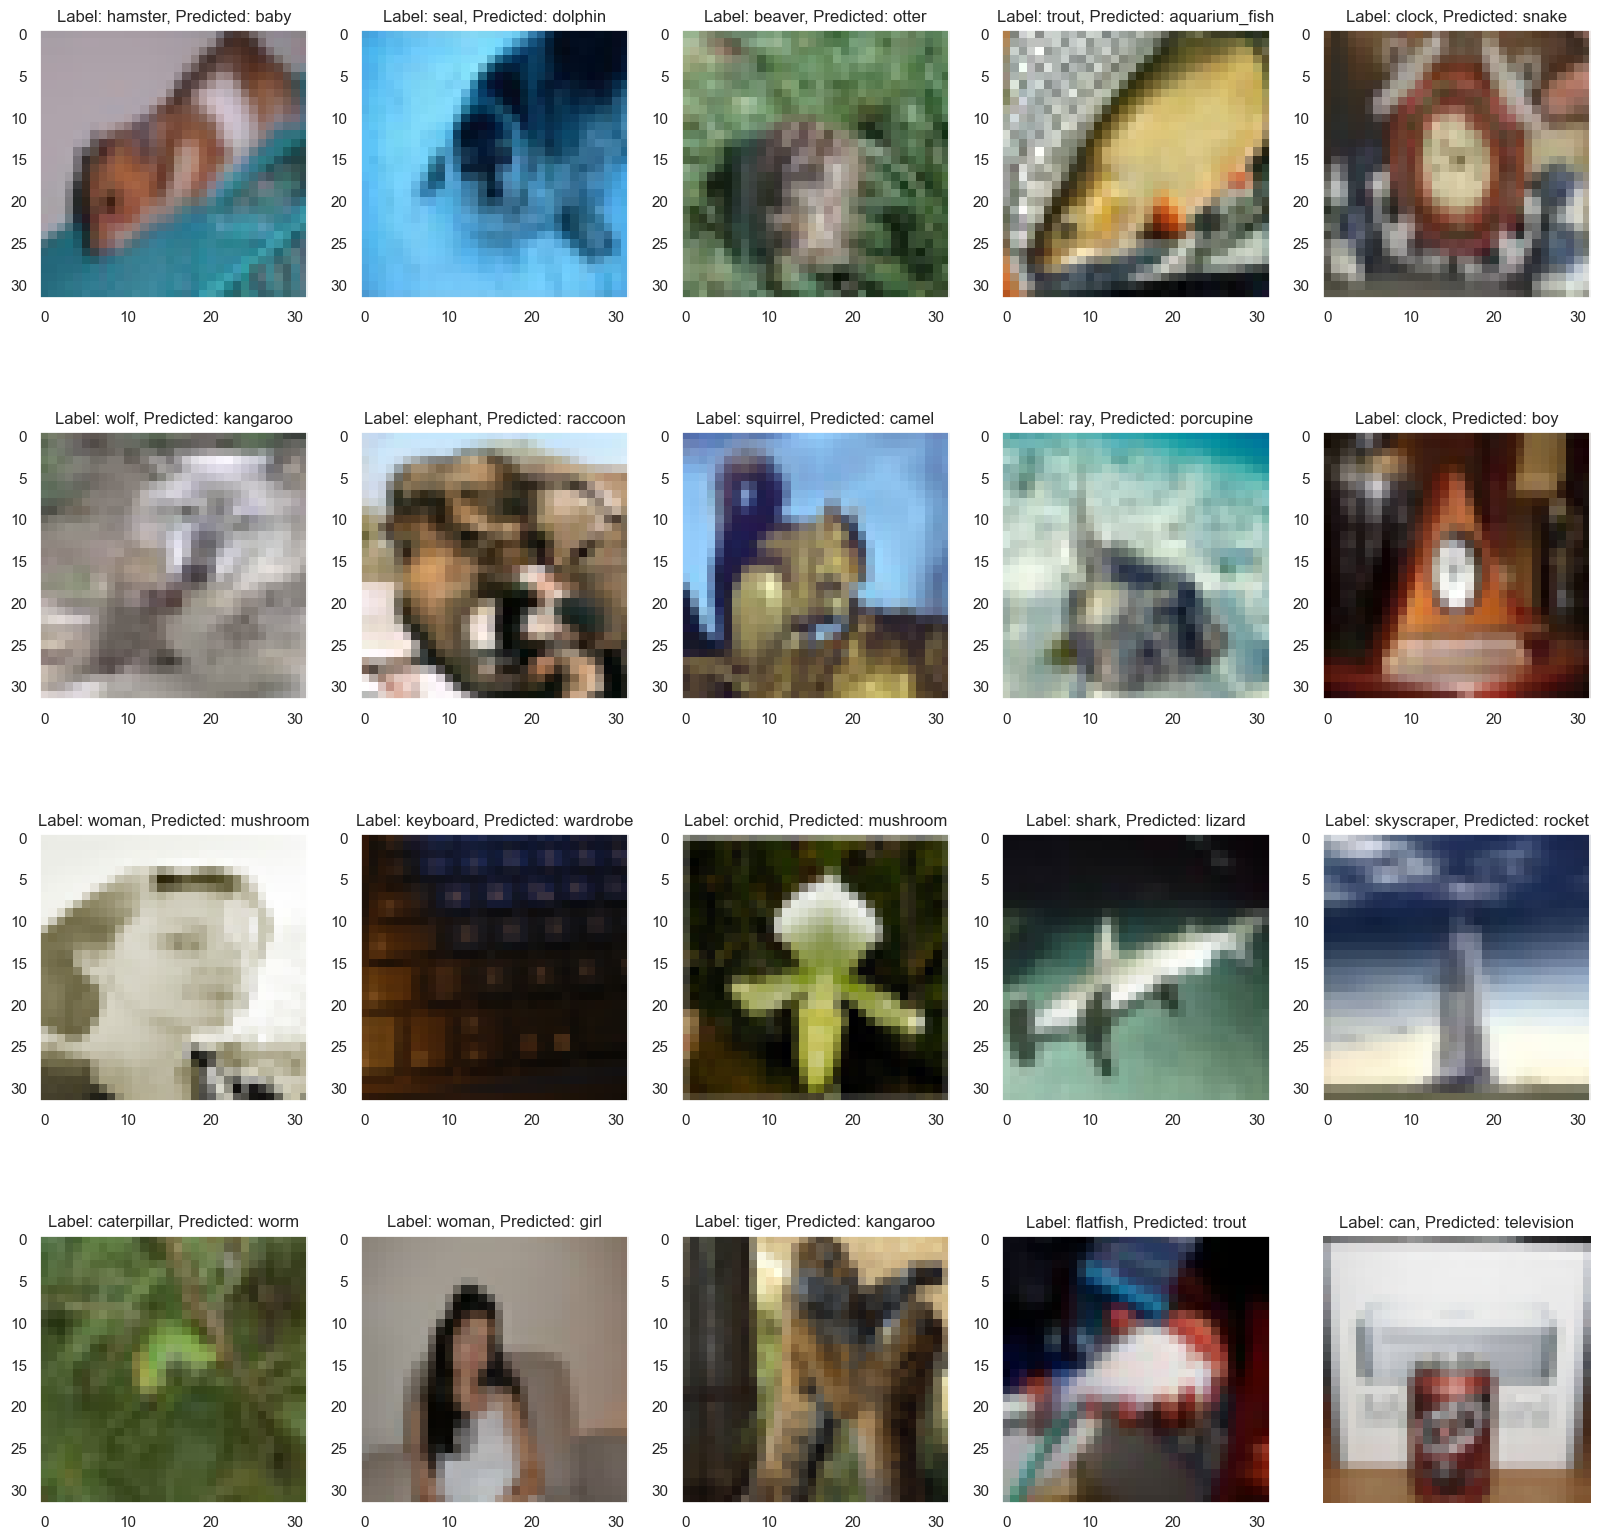

In [86]:
random_idxs = np.random.choice(X_test_wrong.shape[0], 20, replace=False)

fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
  pred = class_labels[y_pred_wrong[idx]]
  actual = class_labels[y_test_wrong[idx]]
  subplot.imshow(X_test_wrong[idx], cmap='gray')
  subplot.set_title(f"Label: {actual}, Predicted: {pred}")

When looking at a sample of the examples where the model made a wrong prediction, we can see that there is a common thread:

- The low pixel resolution makes it ambguious even to a human what the correct class is.
- Most of the mistakes made are resonable. For example our model predicted a woman to be a girl. Most of the error are because the correct label is very close to the wrong label

## Summary
In summary, I experimented with various models, and found that a custom built VGG16 with batch normalization, L2 regularisation, Dropout, SGD optimizer and CutMix data augmentation performed the best with the least overfitting.

- The final model has a respectable validation accuracy, given the lack of data for each class, only 400 - 500 images each class. On top of that there some image where the label are no clear. For exmaple there is on image where is show a human with a lawnmower, however it is label as human and not lawnmower.
- Our model is far from perfect
- Perhaps with more experimentation, I might find them to perform better, but I am satisified with the current model that I have, as it is fairly light weight (in comparison to other models)
- There is also more room for exploration in terms of the learning rate scheduler, optimizer and certain architectural improvements
- I am certain that if we were to hyperparameter tune our model we would see our model make less mistakes, thats one way on improving
- We could experiment with squeeze ecite blocks